In [2]:
import cv2

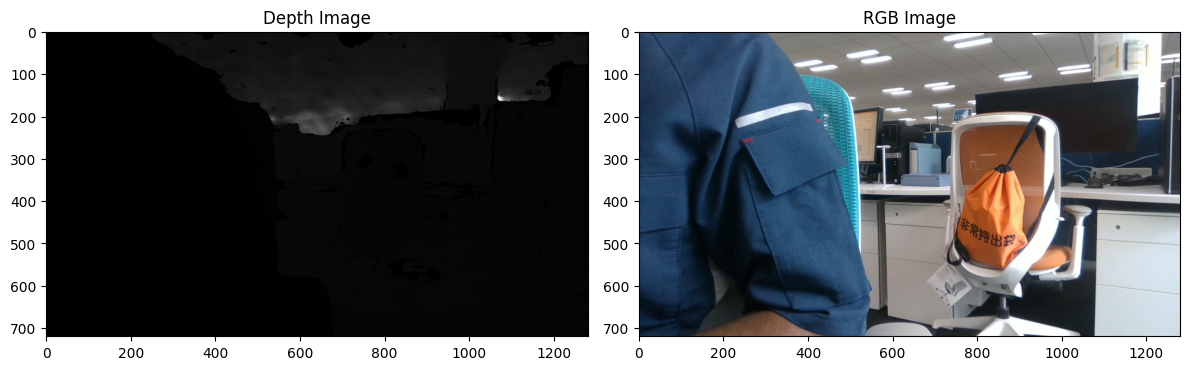

Done!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pyrealsense2 as rs

pipe = rs.pipeline()                                       # Create a pipeline
cfg = rs.config()                                          # Create a configuration for the pipeline

# Enable depth and color streams
cfg.enable_stream(rs.stream.depth)
cfg.enable_stream(rs.stream.color)

colorizer = rs.colorizer()                                 # Mapping depth data into RGB color space
profile = pipe.start(cfg)                                  # Configure and start the pipeline

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))  # Show 1 row with 2 columns for Depth and RGB frames
title = ["Depth Image", "RGB Image"]                       # Title for each frame

for _ in range(10):                                        # Skip first frames to give syncer and auto-exposure time to adjust
    frameset = pipe.wait_for_frames()

for _ in range(5):                                         # Increase to display more frames
    frameset = pipe.wait_for_frames()                      # Read frames from the file, packaged as a frameset
    depth_frame = frameset.get_depth_frame()               # Get depth frame
    color_frame = frameset.get_color_frame()               # Get RGB frame

    if depth_frame and color_frame:
        depth_image = np.asanyarray(depth_frame.get_data())          # Convert depth frame to numpy array
        color_image = np.asanyarray(color_frame.get_data())          # Convert color frame to numpy array

        # Resize depth frame to match the dimensions of the color frame
        depth_image_resized = cv2.resize(depth_image, (color_image.shape[1], color_image.shape[0]))

        # Stack the color and depth images together to create an RGBD image
        rgbd_image = np.dstack((color_image, depth_image_resized))

        for i, ax in enumerate(axs.flatten()):                      # Iterate over all (Depth and RGB) colorized frames
            plt.sca(ax)                                             # Set the current Axes and Figure
            if i == 0:
                plt.imshow(depth_image_resized, cmap='gray')       # Display depth frame
            elif i == 1:
                plt.imshow(color_image)                             # Display color frame
            plt.title(title[i])                                     # Add title for each subplot

        clear_output(wait=True)                                     # Clear any previous frames from the display
        plt.tight_layout()                                          # Adjusts display size to fit frames
        plt.pause(1)                                                # Make the playback slower so it's noticeable

pipe.stop()                                                         # Stop the pipeline
print("Done!")


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pyrealsense2 as rs

pipe = rs.pipeline()                                       # Create a pipeline
cfg = rs.config()                                          # Create a configuration for the pipeline

# Enable depth and color streams
cfg.enable_stream(rs.stream.depth)
cfg.enable_stream(rs.stream.color)

colorizer = rs.colorizer()                                 # Mapping depth data into RGB color space
profile = pipe.start(cfg)                                  # Configure and start the pipeline

rgbd_data_list = []                                        # List to store RGBD data

for _ in range(10):                                        # Skip first frames to give syncer and auto-exposure time to adjust
    frameset = pipe.wait_for_frames()

for _ in range(5):                                         # Increase to capture more frames
    frameset = pipe.wait_for_frames()                      # Read frames from the file, packaged as a frameset
    depth_frame = frameset.get_depth_frame()               # Get depth frame
    color_frame = frameset.get_color_frame()               # Get RGB frame

    if depth_frame and color_frame:
        depth_image = np.asanyarray(depth_frame.get_data())          # Convert depth frame to numpy array
        color_image = np.asanyarray(color_frame.get_data())          # Convert color frame to numpy array

        # Resize depth frame to match the dimensions of the color frame
        depth_image_resized = cv2.resize(depth_image, (color_image.shape[1], color_image.shape[0]))

        # Stack the color and depth images together to create an RGBD image
        rgbd_image = np.dstack((color_image, depth_image_resized))

        rgbd_data_list.append(rgbd_image)                            # Append RGBD data to the list

# Convert the list of RGBD data to a NumPy array
rgbd_data_array = np.array(rgbd_data_list)

pipe.stop()                                                         # Stop the pipeline
print("Done!")


Done!


In [5]:
rgbd_data_array

array([[[[  20,   65,   94,    0],
         [  23,   68,   97,    0],
         [  19,   66,   91,    0],
         ...,
         [  85,  138,  138,    0],
         [  83,  140,  136,    0],
         [  83,  140,  136,    0]],

        [[  19,   66,   95,    0],
         [  19,   66,   95,    0],
         [  19,   66,   91,    0],
         ...,
         [  86,  140,  137,    0],
         [  83,  140,  136,    0],
         [  83,  140,  136,    0]],

        [[  18,   67,   95,    0],
         [  17,   66,   94,    0],
         [  21,   70,   94,    0],
         ...,
         [  86,  140,  137,    0],
         [  82,  136,  133,    0],
         [  84,  138,  135,    0]],

        ...,

        [[   1,   42,   66,    0],
         [   2,   43,   67,    0],
         [   3,   44,   68,    0],
         ...,
         [ 152,  222,  218, 1280],
         [ 154,  224,  220,  632],
         [ 154,  224,  220,    0]],

        [[   2,   45,   66,    0],
         [   2,   45,   66,    0],
         [  

In [6]:
rgbd_data_array.shape

(5, 720, 1280, 4)

dimension of rgbd_data_array = (num_frames, height, width, channels)

    num_frames represents the number of frames captured.
    height represents the height of each frame.
    width represents the width of each frame.
    channels represents the number of channels in each frame, which is 4 (RGBD)

Content:

    Each element of rgbd_data_array represents an RGBD image captured at a specific frame.
    The RGBD image is represented as a 3D array with shape (height, width, channels).
    The first three channels (RGB) represent the color information, and the fourth channel (Depth) represents the depth information.
    The color information is stored as integers ranging from 0 to 255, representing the intensity of red, green, and blue colors.
    The depth information is also stored as integers, typically representing the distance from the camera in millimeters or another depth unit.

Accessing Data:

    You can access individual frames or specific pixel values within frames using NumPy indexing and slicing.
    For example, rgbd_data_array[0] would give you the first frame in the sequence.
    To access pixel values in a specific frame, you can use array indexing like rgbd_data_array[frame_index, row_index, col_index, channel_index].
    

In [7]:
rgbd_data_array[0].shape

(720, 1280, 4)

In [8]:
rgbd_data_array[0]

array([[[  2,  36,  44,   0],
        [  2,  36,  44,   0],
        [  0,  34,  42,   0],
        ...,
        [107, 182, 188,   0],
        [106, 184, 189,   0],
        [105, 183, 188,   0]],

       [[  1,  35,  43,   0],
        [  0,  34,  42,   0],
        [  0,  33,  41,   0],
        ...,
        [107, 182, 188,   0],
        [106, 184, 189,   0],
        [106, 184, 189,   0]],

       [[  1,  33,  42,   0],
        [  1,  33,  42,   0],
        [  0,  34,  42,   0],
        ...,
        [105, 183, 186,   0],
        [109, 187, 190,   0],
        [107, 185, 188,   0]],

       ...,

       [[  0,  15,  13,   0],
        [  0,  16,  14,   0],
        [  0,  16,  14,   0],
        ...,
        [ 96, 168, 168,   0],
        [ 96, 168, 168,   0],
        [ 95, 167, 167,   0]],

       [[  0,  15,  11,   0],
        [  0,  16,  12,   0],
        [  0,  16,  12,   0],
        ...,
        [ 95, 167, 167,   0],
        [102, 171, 172,   0],
        [ 98, 167, 168,   0]],

       [[  0

In [7]:

import pyrealsense2 as rs
import numpy as np
import cv2

# Configure depth and color streams
pipeline = rs.pipeline()
config = rs.config()

# Get device product line for setting a supporting resolution
pipeline_wrapper = rs.pipeline_wrapper(pipeline)
pipeline_profile = config.resolve(pipeline_wrapper)
device = pipeline_profile.get_device()
device_product_line = str(device.get_info(rs.camera_info.product_line))

found_rgb = False
for s in device.sensors:
    if s.get_info(rs.camera_info.name) == 'RGB Camera':
        found_rgb = True
        break
if not found_rgb:
    print("The demo requires Depth camera with Color sensor")
    exit(0)

config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
pipeline.start(config)

try:
    while True:

        # Wait for a coherent pair of frames: depth and color
        frames = pipeline.wait_for_frames()
        depth_frame = frames.get_depth_frame()
        color_frame = frames.get_color_frame()
        if not depth_frame or not color_frame:
            continue

        # Convert images to numpy arrays
        depth_image = np.asanyarray(depth_frame.get_data())
        color_image = np.asanyarray(color_frame.get_data())

        # Apply colormap on depth image (image must be converted to 8-bit per pixel first)
        depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)

        depth_colormap_dim = depth_colormap.shape
        color_colormap_dim = color_image.shape

        # If depth and color resolutions are different, resize color image to match depth image for display
        if depth_colormap_dim != color_colormap_dim:
            resized_color_image = cv2.resize(color_image, dsize=(depth_colormap_dim[1], depth_colormap_dim[0]), interpolation=cv2.INTER_AREA)
            images = np.hstack((resized_color_image, depth_colormap))
        else:
            images = np.hstack((color_image, depth_colormap))

        # Show images
        cv2.namedWindow('RealSense', cv2.WINDOW_AUTOSIZE)
        cv2.imshow('RealSense', images)
        cv2.waitKey(1)

finally:

    # Stop streaming
    pipeline.stop()

KeyboardInterrupt: 

In [1]:
import pyrealsense2 as rs
import numpy as np
import cv2

# Configure depth and color streams
pipeline = rs.pipeline()
config = rs.config()

# Get device product line for setting a supporting resolution
pipeline_wrapper = rs.pipeline_wrapper(pipeline)  # used to wrap the pipeline object for configuration resolution
pipeline_profile = config.resolve(pipeline_wrapper) # resolves the configuration settings for the pipeline
device = pipeline_profile.get_device()
device_product_line = str(device.get_info(rs.camera_info.product_line))

found_rgb = False
for s in device.sensors:
    if s.get_info(rs.camera_info.name) == 'RGB Camera':
        found_rgb = True
        break
if not found_rgb:
    print("The demo requires Depth camera with Color sensor")
    exit(0)

config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
pipeline.start(config)

try:
    # Open text file for writing
    f = open('RGBDdata.txt', 'w')

    while True:

        # Wait for a coherent pair of frames: depth and color
        frames = pipeline.wait_for_frames()
        depth_frame = frames.get_depth_frame()
        color_frame = frames.get_color_frame()
        if not depth_frame or not color_frame:
            continue

        # Convert images to numpy arrays
        depth_image = np.asanyarray(depth_frame.get_data())
        color_image = np.asanyarray(color_frame.get_data())

        # Write depth data to the text file
        f.write("Depth Data:\n")
        f.write(np.array2string(depth_image, separator=',') + "\n")

        # Write color data to the text file
        f.write("\nColor Data (BGR format):\n")
        for row in color_image:
            for pixel in row:
                f.write(f"{pixel[0]}, {pixel[1]}, {pixel[2]}\n")

        f.write("\n\n")

        # Apply colormap on depth image (image must be converted to 8-bit per pixel first)
        depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)

        depth_colormap_dim = depth_colormap.shape
        color_colormap_dim = color_image.shape

        # If depth and color resolutions are different, resize color image to match depth image for display
        if depth_colormap_dim != color_colormap_dim:
            resized_color_image = cv2.resize(color_image, dsize=(depth_colormap_dim[1], depth_colormap_dim[0]), interpolation=cv2.INTER_AREA)
            images = np.hstack((resized_color_image, depth_colormap))
        else:
            images = np.hstack((color_image, depth_colormap))

        # Show images
        cv2.namedWindow('RealSense', cv2.WINDOW_AUTOSIZE)
        cv2.imshow('RealSense', images)
        cv2.waitKey(1)

finally:
    # Close the text file
    f.close()

    # Stop streaming
    pipeline.stop()


KeyboardInterrupt: 